## Q2

In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
d = np.empty(200)
d[0:100] = +1.0
d[100:200] = -1.0

In [24]:
def mean_A(x):
  n = x.shape[0]
  m = np.cumsum(x) / np.arange(1, n + 1)
  return m

In [25]:
def mean_B(x, beta):
  n = x.shape[0]
  m = np.zeros(n)
  m[0] = beta * 0 + (1 - beta) * x[0]

  for t in range(1, n):
    m[t] = beta * m[t - 1] + (1 - beta) * x[t]
    
  return m

In [26]:
def mean_C(x, beta):
  n = x.shape[0]
  m = np.zeros(n)
  m[0] = 0

  for t in range(1, n):
    m[t] = x[t] / (1 - beta ** t)
    
  return m

In [27]:
m = mean_A(d)

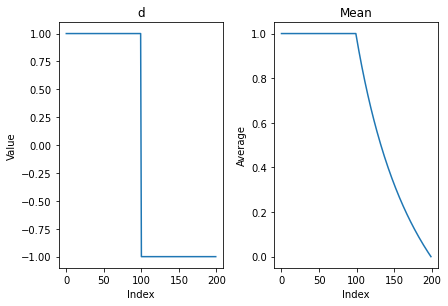

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.tight_layout(w_pad=2)

ax1.set_title("d")
ax1.set_xlabel("Index")
ax1.set_ylabel("Value")
ax1.plot(d)

ax2.set_title("Mean")
ax2.set_xlabel("Index")
ax2.set_ylabel("Average")
ax2.plot(m)

fig.show()

In [29]:
beta = 0.9
m1 = mean_B(d, beta)
m2 = mean_C(m1, beta)

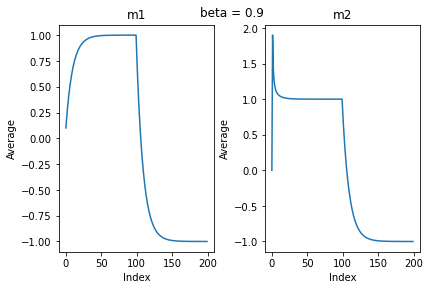

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.tight_layout(pad=2)
fig.suptitle(f"beta = {beta}")

ax1.set_title("m1")
ax1.set_xlabel("Index")
ax1.set_ylabel("Average")
ax1.plot(m1)

ax2.set_title("m2")
ax2.set_xlabel("Index")
ax2.set_ylabel("Average")
ax2.plot(m2)

fig.show()

In [31]:
beta = 0.999
m1 = mean_B(d, beta)
m2 = mean_C(m1, beta)

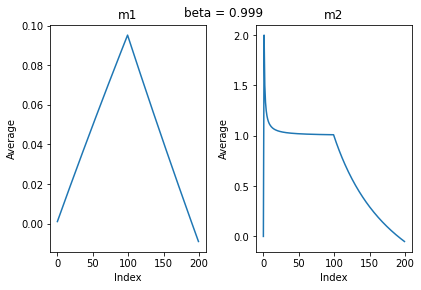

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.tight_layout(pad=2)
fig.suptitle(f"beta = {beta}")

ax1.set_title("m1")
ax1.set_xlabel("Index")
ax1.set_ylabel("Average")
ax1.plot(m1)

ax2.set_title("m2")
ax2.set_xlabel("Index")
ax2.set_ylabel("Average")
ax2.plot(m2)

fig.show()

## Q3

In [33]:
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model

np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [34]:
def plot_results(title, acc, val_acc, loss, val_loss):
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.tight_layout(pad=2)
  fig.suptitle(title)

  ax1.set_title('Accuracy')
  ax1.plot(acc)
  ax1.plot(val_acc)
  ax1.set_ylabel('accuracy')
  ax1.set_xlabel('epoch')
  ax1.legend(['training', 'validation'], loc='lower right')

  ax2.set_title('Loss')
  ax2.plot(loss)
  ax2.plot(val_loss)
  ax2.set_ylabel('loss')
  ax2.set_xlabel('epoch')
  ax2.legend(['training', 'validation'], loc='upper right')

  fig.show()

In [35]:
def model_factory(input_shape, output_shape, hidden_units):
  # Input Layer
  input = Input(input_shape)
  x = Flatten()(input)
  
  # Hidden Layer
  x = Dense(hidden_units, activation="relu")(x)

  # Output Layer
  output = Dense(output_shape, activation="softmax")(x)

  return Model(inputs=input, outputs=output)

In [36]:
(x_train, y_train), (x_test, y_test) = load_data()

In [37]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [38]:
def model_wrapper(
    hidden_units,
    optimizer,
    epochs,
    val_split,
    plot_title,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
):
  # Common Hyperparams
  HEIGHT = 28
  WIDTH = 28
  CLASSES = 10
  BATCH_SIZE = 64
  LOSS = "sparse_categorical_crossentropy"

  model = model_factory(
      input_shape=(HEIGHT, WIDTH),
      output_shape=CLASSES,
      hidden_units=hidden_units
  )

  model.compile(
      optimizer=optimizer,
      loss=LOSS,
      metrics=['accuracy']
  )

  print("Training")
  history = model.fit(
      x=x_train,
      y=y_train,
      batch_size=BATCH_SIZE,
      epochs=epochs,
      validation_split=val_split
  )

  print("\nEvaluation")
  model.evaluate(
      x=x_test,
      y=y_test,
      batch_size=BATCH_SIZE
  )

  print("\nPlots")
  plot_results(
      title=plot_title,
      acc=history.history['accuracy'],
      val_acc=history.history['val_accuracy'],
      loss=history.history['loss'],
      val_loss=history.history['val_loss']
  )

### Choosing number of hidden units

Training
Epoch 1/50
750/750 [==============================] - 2s 2ms/step - loss: 2.5059 - accuracy: 0.1806 - val_loss: 2.1105 - val_accuracy: 0.2002
Epoch 2/50
750/750 [==============================] - 2s 2ms/step - loss: 2.0714 - accuracy: 0.2093 - val_loss: 2.0658 - val_accuracy: 0.2118
Epoch 3/50
750/750 [==============================] - 2s 2ms/step - loss: 2.0337 - accuracy: 0.2236 - val_loss: 2.0256 - val_accuracy: 0.2269
Epoch 4/50
750/750 [==============================] - 2s 2ms/step - loss: 1.9974 - accuracy: 0.2385 - val_loss: 1.9965 - val_accuracy: 0.2391
Epoch 5/50
750/750 [==============================] - 2s 2ms/step - loss: 1.9254 - accuracy: 0.2599 - val_loss: 2.0679 - val_accuracy: 0.2579
Epoch 6/50
750/750 [==============================] - 2s 2ms/step - loss: 1.8500 - accuracy: 0.2730 - val_loss: 1.8408 - val_accuracy: 0.2659
Epoch 7/50
750/750 [==============================] - 2s 2ms/step - loss: 1.8206 - accuracy: 0.2788 - val_loss: 1.8325 - val_accuracy: 0.26

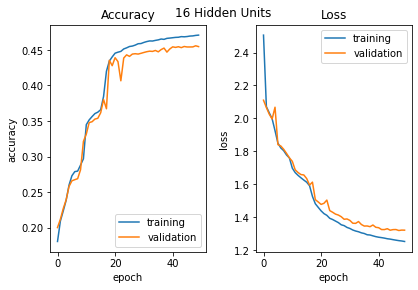

In [39]:
VAL_SPLIT = 0.2
HIDDEN_UNITS = 16
LEARNING_RATE = 0.001
OPTIMIZER = SGD(learning_rate=LEARNING_RATE)
EPOCHS = 50
PLOT_TITLE = f"{HIDDEN_UNITS} Hidden Units"

model_wrapper(
    hidden_units=HIDDEN_UNITS,
    optimizer=OPTIMIZER,
    epochs=EPOCHS,
    val_split=VAL_SPLIT,
    plot_title=PLOT_TITLE
)

Training
Epoch 1/50
750/750 [==============================] - 2s 2ms/step - loss: 3.6684 - accuracy: 0.2495 - val_loss: 1.9277 - val_accuracy: 0.2697
Epoch 2/50
750/750 [==============================] - 1s 2ms/step - loss: 1.8292 - accuracy: 0.3275 - val_loss: 1.7756 - val_accuracy: 0.3397
Epoch 3/50
750/750 [==============================] - 2s 2ms/step - loss: 1.7573 - accuracy: 0.3501 - val_loss: 1.7470 - val_accuracy: 0.3496
Epoch 4/50
750/750 [==============================] - 1s 2ms/step - loss: 1.7046 - accuracy: 0.3720 - val_loss: 1.6794 - val_accuracy: 0.3887
Epoch 5/50
750/750 [==============================] - 1s 2ms/step - loss: 1.5050 - accuracy: 0.4652 - val_loss: 1.4560 - val_accuracy: 0.4724
Epoch 6/50
750/750 [==============================] - 1s 2ms/step - loss: 1.4159 - accuracy: 0.4873 - val_loss: 1.4437 - val_accuracy: 0.4951
Epoch 7/50
750/750 [==============================] - 1s 2ms/step - loss: 1.3545 - accuracy: 0.5100 - val_loss: 1.3260 - val_accuracy: 0.52

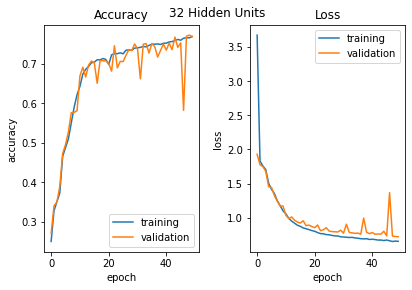

In [40]:
VAL_SPLIT = 0.2
HIDDEN_UNITS = 32
LEARNING_RATE = 0.001
OPTIMIZER = SGD(learning_rate=LEARNING_RATE)
EPOCHS = 50
PLOT_TITLE = f"{HIDDEN_UNITS} Hidden Units"

model_wrapper(
    hidden_units=HIDDEN_UNITS,
    optimizer=OPTIMIZER,
    epochs=EPOCHS,
    val_split=VAL_SPLIT,
    plot_title=PLOT_TITLE
)

Training
Epoch 1/50
750/750 [==============================] - 2s 3ms/step - loss: 4.9866 - accuracy: 0.3754 - val_loss: 1.5761 - val_accuracy: 0.4561
Epoch 2/50
750/750 [==============================] - 2s 2ms/step - loss: 1.3824 - accuracy: 0.5428 - val_loss: 1.2948 - val_accuracy: 0.5866
Epoch 3/50
750/750 [==============================] - 2s 2ms/step - loss: 1.1873 - accuracy: 0.6193 - val_loss: 1.1173 - val_accuracy: 0.6434
Epoch 4/50
750/750 [==============================] - 2s 2ms/step - loss: 1.0622 - accuracy: 0.6223 - val_loss: 0.9878 - val_accuracy: 0.6378
Epoch 5/50
750/750 [==============================] - 2s 2ms/step - loss: 0.9424 - accuracy: 0.6415 - val_loss: 0.8952 - val_accuracy: 0.6593
Epoch 6/50
750/750 [==============================] - 2s 2ms/step - loss: 0.8516 - accuracy: 0.6754 - val_loss: 0.8033 - val_accuracy: 0.7003
Epoch 7/50
750/750 [==============================] - 2s 2ms/step - loss: 0.7720 - accuracy: 0.7013 - val_loss: 0.7418 - val_accuracy: 0.70

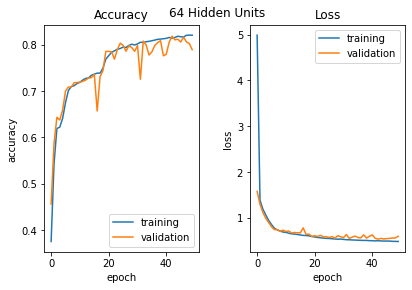

In [41]:
VAL_SPLIT = 0.2
HIDDEN_UNITS = 64
LEARNING_RATE = 0.001
OPTIMIZER = SGD(learning_rate=LEARNING_RATE)
EPOCHS = 50
PLOT_TITLE = f"{HIDDEN_UNITS} Hidden Units"

model_wrapper(
    hidden_units=HIDDEN_UNITS,
    optimizer=OPTIMIZER,
    epochs=EPOCHS,
    val_split=VAL_SPLIT,
    plot_title=PLOT_TITLE
)

Training
Epoch 1/50
750/750 [==============================] - 3s 3ms/step - loss: 3.7825 - accuracy: 0.4862 - val_loss: 1.3394 - val_accuracy: 0.5883
Epoch 2/50
750/750 [==============================] - 2s 3ms/step - loss: 1.0800 - accuracy: 0.6348 - val_loss: 0.8885 - val_accuracy: 0.6901
Epoch 3/50
750/750 [==============================] - 2s 3ms/step - loss: 0.8312 - accuracy: 0.6900 - val_loss: 0.7935 - val_accuracy: 0.7092
Epoch 4/50
750/750 [==============================] - 2s 3ms/step - loss: 0.7331 - accuracy: 0.7067 - val_loss: 0.7597 - val_accuracy: 0.7159
Epoch 5/50
750/750 [==============================] - 2s 3ms/step - loss: 0.6924 - accuracy: 0.7171 - val_loss: 0.7326 - val_accuracy: 0.7183
Epoch 6/50
750/750 [==============================] - 2s 3ms/step - loss: 0.6651 - accuracy: 0.7260 - val_loss: 0.6969 - val_accuracy: 0.7299
Epoch 7/50
750/750 [==============================] - 2s 3ms/step - loss: 0.6419 - accuracy: 0.7298 - val_loss: 0.6950 - val_accuracy: 0.73

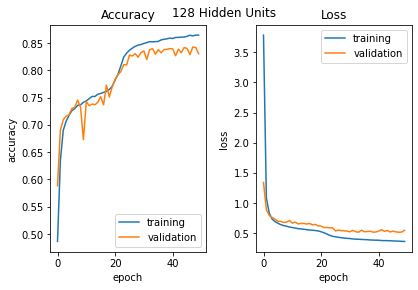

In [42]:
VAL_SPLIT = 0.2
HIDDEN_UNITS = 128
LEARNING_RATE = 0.001
OPTIMIZER = SGD(learning_rate=LEARNING_RATE)
EPOCHS = 50
PLOT_TITLE = f"{HIDDEN_UNITS} Hidden Units"

model_wrapper(
    hidden_units=HIDDEN_UNITS,
    optimizer=OPTIMIZER,
    epochs=EPOCHS,
    val_split=VAL_SPLIT,
    plot_title=PLOT_TITLE
)

### Choosing validation split

Training
Epoch 1/50
797/797 [==============================] - 2s 2ms/step - loss: 3.1993 - accuracy: 0.1243 - val_loss: 2.2533 - val_accuracy: 0.1232
Epoch 2/50
797/797 [==============================] - 1s 2ms/step - loss: 2.2247 - accuracy: 0.1424 - val_loss: 2.2235 - val_accuracy: 0.1394
Epoch 3/50
797/797 [==============================] - 2s 2ms/step - loss: 2.2047 - accuracy: 0.1507 - val_loss: 2.2001 - val_accuracy: 0.1444
Epoch 4/50
797/797 [==============================] - 1s 2ms/step - loss: 2.1865 - accuracy: 0.1570 - val_loss: 2.1871 - val_accuracy: 0.1511
Epoch 5/50
797/797 [==============================] - 2s 2ms/step - loss: 2.1712 - accuracy: 0.1630 - val_loss: 2.1761 - val_accuracy: 0.1533
Epoch 6/50
797/797 [==============================] - 2s 2ms/step - loss: 2.1473 - accuracy: 0.1675 - val_loss: 2.1429 - val_accuracy: 0.1553
Epoch 7/50
797/797 [==============================] - 1s 2ms/step - loss: 2.1220 - accuracy: 0.1688 - val_loss: 2.1456 - val_accuracy: 0.15

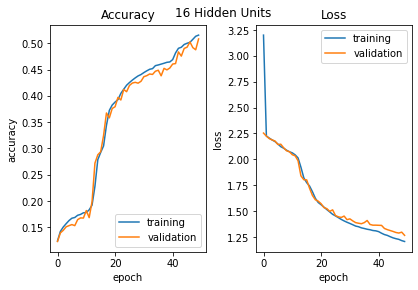

In [43]:
VAL_SPLIT = 0.15
HIDDEN_UNITS = 16
LEARNING_RATE = 0.001
OPTIMIZER = SGD(learning_rate=LEARNING_RATE)
EPOCHS = 50
PLOT_TITLE = f"{HIDDEN_UNITS} Hidden Units"

model_wrapper(
    hidden_units=HIDDEN_UNITS,
    optimizer=OPTIMIZER,
    epochs=EPOCHS,
    val_split=VAL_SPLIT,
    plot_title=PLOT_TITLE
)

Training
Epoch 1/50
797/797 [==============================] - 2s 2ms/step - loss: 2.0571 - accuracy: 0.3730 - val_loss: 1.5960 - val_accuracy: 0.4361
Epoch 2/50
797/797 [==============================] - 1s 2ms/step - loss: 1.5523 - accuracy: 0.4595 - val_loss: 1.5043 - val_accuracy: 0.4616
Epoch 3/50
797/797 [==============================] - 1s 2ms/step - loss: 1.4551 - accuracy: 0.4882 - val_loss: 1.4161 - val_accuracy: 0.5084
Epoch 4/50
797/797 [==============================] - 1s 2ms/step - loss: 1.3976 - accuracy: 0.5073 - val_loss: 1.3542 - val_accuracy: 0.5118
Epoch 5/50
797/797 [==============================] - 1s 2ms/step - loss: 1.3411 - accuracy: 0.5250 - val_loss: 1.4124 - val_accuracy: 0.4861
Epoch 6/50
797/797 [==============================] - 2s 2ms/step - loss: 1.2754 - accuracy: 0.5460 - val_loss: 1.2898 - val_accuracy: 0.5420
Epoch 7/50
797/797 [==============================] - 1s 2ms/step - loss: 1.2208 - accuracy: 0.5596 - val_loss: 1.1974 - val_accuracy: 0.55

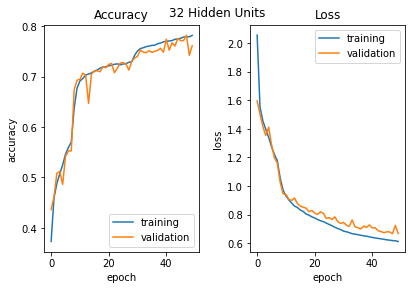

In [44]:
VAL_SPLIT = 0.15
HIDDEN_UNITS = 32
LEARNING_RATE = 0.001
OPTIMIZER = SGD(learning_rate=LEARNING_RATE)
EPOCHS = 50
PLOT_TITLE = f"{HIDDEN_UNITS} Hidden Units"

model_wrapper(
    hidden_units=HIDDEN_UNITS,
    optimizer=OPTIMIZER,
    epochs=EPOCHS,
    val_split=VAL_SPLIT,
    plot_title=PLOT_TITLE
)

Training
Epoch 1/50
797/797 [==============================] - 2s 2ms/step - loss: 6.0067 - accuracy: 0.2105 - val_loss: 1.9612 - val_accuracy: 0.2961
Epoch 2/50
797/797 [==============================] - 2s 2ms/step - loss: 1.7393 - accuracy: 0.3751 - val_loss: 1.6585 - val_accuracy: 0.4118
Epoch 3/50
797/797 [==============================] - 2s 2ms/step - loss: 1.5751 - accuracy: 0.4285 - val_loss: 1.5434 - val_accuracy: 0.4403
Epoch 4/50
797/797 [==============================] - 2s 2ms/step - loss: 1.4693 - accuracy: 0.4515 - val_loss: 1.4764 - val_accuracy: 0.4391
Epoch 5/50
797/797 [==============================] - 2s 2ms/step - loss: 1.4111 - accuracy: 0.4591 - val_loss: 1.4316 - val_accuracy: 0.4378
Epoch 6/50
797/797 [==============================] - 2s 2ms/step - loss: 1.3666 - accuracy: 0.4697 - val_loss: 1.3488 - val_accuracy: 0.4924
Epoch 7/50
797/797 [==============================] - 2s 2ms/step - loss: 1.2694 - accuracy: 0.5391 - val_loss: 1.2629 - val_accuracy: 0.54

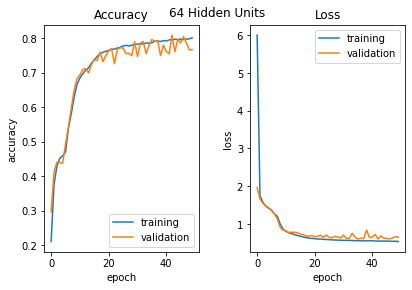

In [45]:
VAL_SPLIT = 0.15
HIDDEN_UNITS = 64
LEARNING_RATE = 0.001
OPTIMIZER = SGD(learning_rate=LEARNING_RATE)
EPOCHS = 50
PLOT_TITLE = f"{HIDDEN_UNITS} Hidden Units"

model_wrapper(
    hidden_units=HIDDEN_UNITS,
    optimizer=OPTIMIZER,
    epochs=EPOCHS,
    val_split=VAL_SPLIT,
    plot_title=PLOT_TITLE
)

Training
Epoch 1/50
797/797 [==============================] - 3s 3ms/step - loss: 6.5991 - accuracy: 0.6265 - val_loss: 0.8720 - val_accuracy: 0.6998
Epoch 2/50
797/797 [==============================] - 2s 3ms/step - loss: 0.8259 - accuracy: 0.7130 - val_loss: 0.7570 - val_accuracy: 0.7322
Epoch 3/50
797/797 [==============================] - 2s 3ms/step - loss: 0.7226 - accuracy: 0.7423 - val_loss: 0.7020 - val_accuracy: 0.7542
Epoch 4/50
797/797 [==============================] - 2s 3ms/step - loss: 0.6661 - accuracy: 0.7637 - val_loss: 0.6795 - val_accuracy: 0.7742
Epoch 5/50
797/797 [==============================] - 2s 3ms/step - loss: 0.6265 - accuracy: 0.7795 - val_loss: 0.6809 - val_accuracy: 0.7781
Epoch 6/50
797/797 [==============================] - 2s 3ms/step - loss: 0.5974 - accuracy: 0.7910 - val_loss: 0.6336 - val_accuracy: 0.7926
Epoch 7/50
797/797 [==============================] - 2s 3ms/step - loss: 0.5685 - accuracy: 0.8024 - val_loss: 0.6068 - val_accuracy: 0.79

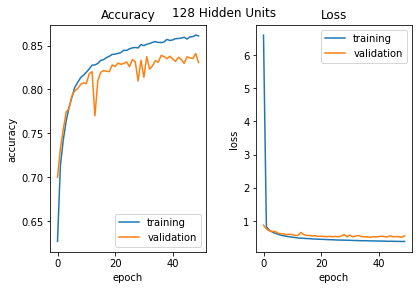

In [46]:
VAL_SPLIT = 0.15
HIDDEN_UNITS = 128
LEARNING_RATE = 0.001
OPTIMIZER = SGD(learning_rate=LEARNING_RATE)
EPOCHS = 50
PLOT_TITLE = f"{HIDDEN_UNITS} Hidden Units"

model_wrapper(
    hidden_units=HIDDEN_UNITS,
    optimizer=OPTIMIZER,
    epochs=EPOCHS,
    val_split=VAL_SPLIT,
    plot_title=PLOT_TITLE
)

Training
Epoch 1/50
704/704 [==============================] - 2s 2ms/step - loss: 3.0166 - accuracy: 0.1074 - val_loss: 2.2660 - val_accuracy: 0.1170
Epoch 2/50
704/704 [==============================] - 1s 2ms/step - loss: 2.2590 - accuracy: 0.1285 - val_loss: 2.2295 - val_accuracy: 0.1373
Epoch 3/50
704/704 [==============================] - 2s 2ms/step - loss: 2.2143 - accuracy: 0.1462 - val_loss: 2.2030 - val_accuracy: 0.1503
Epoch 4/50
704/704 [==============================] - 2s 2ms/step - loss: 2.1948 - accuracy: 0.1540 - val_loss: 2.1989 - val_accuracy: 0.1535
Epoch 5/50
704/704 [==============================] - 2s 2ms/step - loss: 2.1839 - accuracy: 0.1586 - val_loss: 2.1885 - val_accuracy: 0.1610
Epoch 6/50
704/704 [==============================] - 1s 2ms/step - loss: 2.1700 - accuracy: 0.1633 - val_loss: 2.1778 - val_accuracy: 0.1557
Epoch 7/50
704/704 [==============================] - 2s 2ms/step - loss: 2.1571 - accuracy: 0.1678 - val_loss: 2.1671 - val_accuracy: 0.16

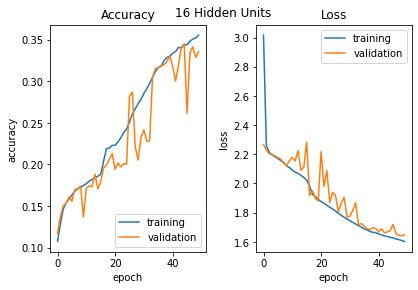

In [47]:
VAL_SPLIT = 0.25
HIDDEN_UNITS = 16
LEARNING_RATE = 0.001
OPTIMIZER = SGD(learning_rate=LEARNING_RATE)
EPOCHS = 50
PLOT_TITLE = f"{HIDDEN_UNITS} Hidden Units"

model_wrapper(
    hidden_units=HIDDEN_UNITS,
    optimizer=OPTIMIZER,
    epochs=EPOCHS,
    val_split=VAL_SPLIT,
    plot_title=PLOT_TITLE
)

Training
Epoch 1/50
704/704 [==============================] - 2s 2ms/step - loss: 4.7881 - accuracy: 0.2051 - val_loss: 2.1441 - val_accuracy: 0.2149
Epoch 2/50
704/704 [==============================] - 1s 2ms/step - loss: 1.8686 - accuracy: 0.2761 - val_loss: 1.7107 - val_accuracy: 0.3760
Epoch 3/50
704/704 [==============================] - 1s 2ms/step - loss: 1.6008 - accuracy: 0.3950 - val_loss: 1.8781 - val_accuracy: 0.3352
Epoch 4/50
704/704 [==============================] - 1s 2ms/step - loss: 1.4967 - accuracy: 0.4276 - val_loss: 1.5405 - val_accuracy: 0.4322
Epoch 5/50
704/704 [==============================] - 1s 2ms/step - loss: 1.4368 - accuracy: 0.4460 - val_loss: 1.4445 - val_accuracy: 0.4465
Epoch 6/50
704/704 [==============================] - 1s 2ms/step - loss: 1.3894 - accuracy: 0.4623 - val_loss: 1.4384 - val_accuracy: 0.3951
Epoch 7/50
704/704 [==============================] - 1s 2ms/step - loss: 1.3492 - accuracy: 0.4723 - val_loss: 1.3931 - val_accuracy: 0.48

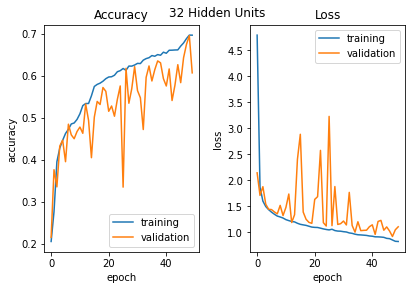

In [48]:
VAL_SPLIT = 0.25
HIDDEN_UNITS = 32
LEARNING_RATE = 0.001
OPTIMIZER = SGD(learning_rate=LEARNING_RATE)
EPOCHS = 50
PLOT_TITLE = f"{HIDDEN_UNITS} Hidden Units"

model_wrapper(
    hidden_units=HIDDEN_UNITS,
    optimizer=OPTIMIZER,
    epochs=EPOCHS,
    val_split=VAL_SPLIT,
    plot_title=PLOT_TITLE
)

Training
Epoch 1/50
704/704 [==============================] - 2s 3ms/step - loss: 4.1757 - accuracy: 0.3771 - val_loss: 1.6437 - val_accuracy: 0.4137
Epoch 2/50
704/704 [==============================] - 2s 2ms/step - loss: 1.5904 - accuracy: 0.4257 - val_loss: 1.7438 - val_accuracy: 0.3941
Epoch 3/50
704/704 [==============================] - 2s 3ms/step - loss: 1.4672 - accuracy: 0.4817 - val_loss: 1.4955 - val_accuracy: 0.4809
Epoch 4/50
704/704 [==============================] - 2s 2ms/step - loss: 1.3780 - accuracy: 0.5159 - val_loss: 1.3967 - val_accuracy: 0.5293
Epoch 5/50
704/704 [==============================] - 2s 2ms/step - loss: 1.1480 - accuracy: 0.6551 - val_loss: 1.0773 - val_accuracy: 0.6802
Epoch 6/50
704/704 [==============================] - 2s 2ms/step - loss: 1.0245 - accuracy: 0.6886 - val_loss: 1.0686 - val_accuracy: 0.6779
Epoch 7/50
704/704 [==============================] - 2s 2ms/step - loss: 0.9744 - accuracy: 0.6962 - val_loss: 1.0348 - val_accuracy: 0.70

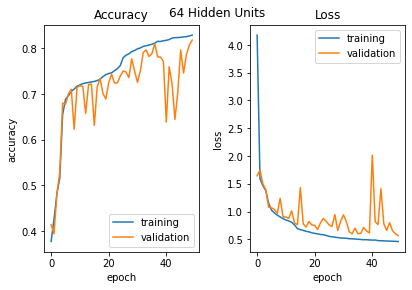

In [49]:
VAL_SPLIT = 0.25
HIDDEN_UNITS = 64
LEARNING_RATE = 0.001
OPTIMIZER = SGD(learning_rate=LEARNING_RATE)
EPOCHS = 50
PLOT_TITLE = f"{HIDDEN_UNITS} Hidden Units"

model_wrapper(
    hidden_units=HIDDEN_UNITS,
    optimizer=OPTIMIZER,
    epochs=EPOCHS,
    val_split=VAL_SPLIT,
    plot_title=PLOT_TITLE
)

Training
Epoch 1/50
704/704 [==============================] - 3s 3ms/step - loss: 6.3327 - accuracy: 0.4959 - val_loss: 1.4108 - val_accuracy: 0.5383
Epoch 2/50
704/704 [==============================] - 2s 3ms/step - loss: 1.3206 - accuracy: 0.5643 - val_loss: 1.3805 - val_accuracy: 0.5304
Epoch 3/50
704/704 [==============================] - 2s 3ms/step - loss: 1.1389 - accuracy: 0.6182 - val_loss: 1.5564 - val_accuracy: 0.6204
Epoch 4/50
704/704 [==============================] - 2s 3ms/step - loss: 1.0284 - accuracy: 0.6690 - val_loss: 1.0936 - val_accuracy: 0.6651
Epoch 5/50
704/704 [==============================] - 2s 3ms/step - loss: 0.9703 - accuracy: 0.6853 - val_loss: 1.0042 - val_accuracy: 0.6946
Epoch 6/50
704/704 [==============================] - 2s 3ms/step - loss: 0.9108 - accuracy: 0.6670 - val_loss: 1.1330 - val_accuracy: 0.6132
Epoch 7/50
704/704 [==============================] - 2s 3ms/step - loss: 0.8604 - accuracy: 0.6604 - val_loss: 0.9176 - val_accuracy: 0.69

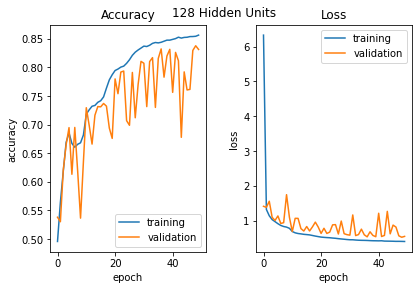

In [50]:
VAL_SPLIT = 0.25
HIDDEN_UNITS = 128
LEARNING_RATE = 0.001
OPTIMIZER = SGD(learning_rate=LEARNING_RATE)
EPOCHS = 50
PLOT_TITLE = f"{HIDDEN_UNITS} Hidden Units"

model_wrapper(
    hidden_units=HIDDEN_UNITS,
    optimizer=OPTIMIZER,
    epochs=EPOCHS,
    val_split=VAL_SPLIT,
    plot_title=PLOT_TITLE
)

Training
Epoch 1/50
657/657 [==============================] - 2s 3ms/step - loss: 2.8021 - accuracy: 0.1233 - val_loss: 2.4099 - val_accuracy: 0.1679
Epoch 2/50
657/657 [==============================] - 1s 2ms/step - loss: 2.1040 - accuracy: 0.1791 - val_loss: 2.2155 - val_accuracy: 0.1943
Epoch 3/50
657/657 [==============================] - 1s 2ms/step - loss: 2.0006 - accuracy: 0.1950 - val_loss: 1.9730 - val_accuracy: 0.1851
Epoch 4/50
657/657 [==============================] - 1s 2ms/step - loss: 1.9638 - accuracy: 0.1971 - val_loss: 1.9369 - val_accuracy: 0.1958
Epoch 5/50
657/657 [==============================] - 1s 2ms/step - loss: 1.9412 - accuracy: 0.1998 - val_loss: 1.9378 - val_accuracy: 0.1969
Epoch 6/50
657/657 [==============================] - 1s 2ms/step - loss: 1.9196 - accuracy: 0.2051 - val_loss: 1.9406 - val_accuracy: 0.1980
Epoch 7/50
657/657 [==============================] - 1s 2ms/step - loss: 1.9037 - accuracy: 0.2069 - val_loss: 2.0740 - val_accuracy: 0.18

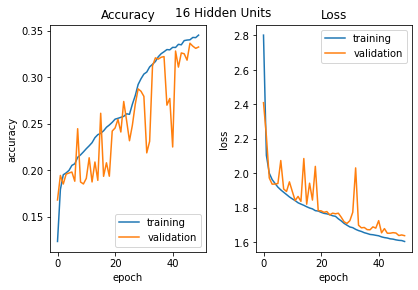

In [51]:
VAL_SPLIT = 0.30
HIDDEN_UNITS = 16
LEARNING_RATE = 0.001
OPTIMIZER = SGD(learning_rate=LEARNING_RATE)
EPOCHS = 50
PLOT_TITLE = f"{HIDDEN_UNITS} Hidden Units"

model_wrapper(
    hidden_units=HIDDEN_UNITS,
    optimizer=OPTIMIZER,
    epochs=EPOCHS,
    val_split=VAL_SPLIT,
    plot_title=PLOT_TITLE
)

Training
Epoch 1/50
657/657 [==============================] - 2s 2ms/step - loss: 4.0701 - accuracy: 0.1586 - val_loss: 2.1030 - val_accuracy: 0.2194
Epoch 2/50
657/657 [==============================] - 1s 2ms/step - loss: 1.9657 - accuracy: 0.2355 - val_loss: 2.1515 - val_accuracy: 0.2417
Epoch 3/50
657/657 [==============================] - 2s 3ms/step - loss: 1.8839 - accuracy: 0.2598 - val_loss: 1.8891 - val_accuracy: 0.2503
Epoch 4/50
657/657 [==============================] - 1s 2ms/step - loss: 1.8159 - accuracy: 0.3017 - val_loss: 1.8186 - val_accuracy: 0.3177
Epoch 5/50
657/657 [==============================] - 1s 2ms/step - loss: 1.7546 - accuracy: 0.3408 - val_loss: 1.7662 - val_accuracy: 0.3390
Epoch 6/50
657/657 [==============================] - 1s 2ms/step - loss: 1.6597 - accuracy: 0.3827 - val_loss: 1.6470 - val_accuracy: 0.3893
Epoch 7/50
657/657 [==============================] - 1s 2ms/step - loss: 1.5704 - accuracy: 0.4225 - val_loss: 1.6326 - val_accuracy: 0.40

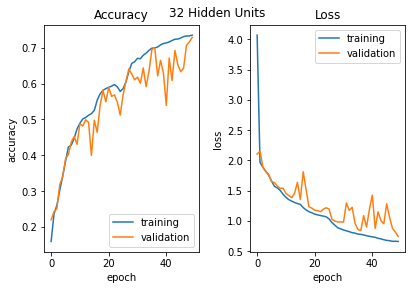

In [52]:
VAL_SPLIT = 0.30
HIDDEN_UNITS = 32
LEARNING_RATE = 0.001
OPTIMIZER = SGD(learning_rate=LEARNING_RATE)
EPOCHS = 50
PLOT_TITLE = f"{HIDDEN_UNITS} Hidden Units"

model_wrapper(
    hidden_units=HIDDEN_UNITS,
    optimizer=OPTIMIZER,
    epochs=EPOCHS,
    val_split=VAL_SPLIT,
    plot_title=PLOT_TITLE
)

Training
Epoch 1/50
657/657 [==============================] - 2s 3ms/step - loss: 5.0127 - accuracy: 0.3860 - val_loss: 1.8341 - val_accuracy: 0.3654
Epoch 2/50
657/657 [==============================] - 2s 3ms/step - loss: 1.5045 - accuracy: 0.4722 - val_loss: 1.4794 - val_accuracy: 0.4772
Epoch 3/50
657/657 [==============================] - 2s 3ms/step - loss: 1.4192 - accuracy: 0.4894 - val_loss: 1.5193 - val_accuracy: 0.4575
Epoch 4/50
657/657 [==============================] - 2s 3ms/step - loss: 1.3743 - accuracy: 0.4988 - val_loss: 1.3928 - val_accuracy: 0.5059
Epoch 5/50
657/657 [==============================] - 2s 3ms/step - loss: 1.3331 - accuracy: 0.5135 - val_loss: 1.3239 - val_accuracy: 0.5196
Epoch 6/50
657/657 [==============================] - 2s 3ms/step - loss: 1.2493 - accuracy: 0.5471 - val_loss: 1.2576 - val_accuracy: 0.5449
Epoch 7/50
657/657 [==============================] - 2s 3ms/step - loss: 1.2116 - accuracy: 0.5590 - val_loss: 1.2496 - val_accuracy: 0.55

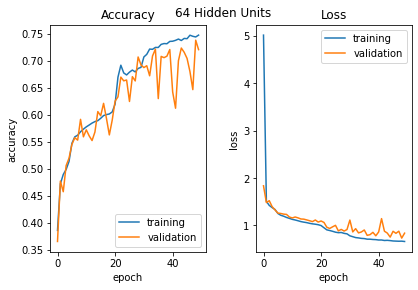

In [53]:
VAL_SPLIT = 0.30
HIDDEN_UNITS = 64
LEARNING_RATE = 0.001
OPTIMIZER = SGD(learning_rate=LEARNING_RATE)
EPOCHS = 50
PLOT_TITLE = f"{HIDDEN_UNITS} Hidden Units"

model_wrapper(
    hidden_units=HIDDEN_UNITS,
    optimizer=OPTIMIZER,
    epochs=EPOCHS,
    val_split=VAL_SPLIT,
    plot_title=PLOT_TITLE
)

Training
Epoch 1/50
657/657 [==============================] - 3s 4ms/step - loss: 5.3900 - accuracy: 0.5347 - val_loss: 1.4194 - val_accuracy: 0.5794
Epoch 2/50
657/657 [==============================] - 2s 3ms/step - loss: 1.0456 - accuracy: 0.6506 - val_loss: 1.1317 - val_accuracy: 0.5915
Epoch 3/50
657/657 [==============================] - 2s 3ms/step - loss: 0.8489 - accuracy: 0.6842 - val_loss: 1.0602 - val_accuracy: 0.6259
Epoch 4/50
657/657 [==============================] - 2s 3ms/step - loss: 0.7827 - accuracy: 0.6945 - val_loss: 0.9219 - val_accuracy: 0.6522
Epoch 5/50
657/657 [==============================] - 2s 3ms/step - loss: 0.7386 - accuracy: 0.7052 - val_loss: 0.9187 - val_accuracy: 0.6814
Epoch 6/50
657/657 [==============================] - 2s 3ms/step - loss: 0.6906 - accuracy: 0.7302 - val_loss: 0.8892 - val_accuracy: 0.6834
Epoch 7/50
657/657 [==============================] - 2s 3ms/step - loss: 0.6620 - accuracy: 0.7445 - val_loss: 0.8571 - val_accuracy: 0.71

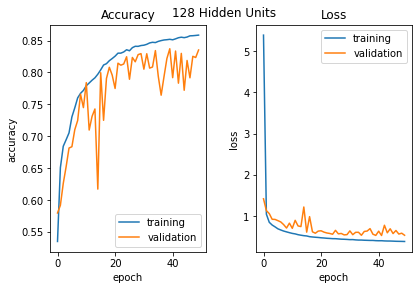

In [54]:
VAL_SPLIT = 0.30
HIDDEN_UNITS = 128
LEARNING_RATE = 0.001
OPTIMIZER = SGD(learning_rate=LEARNING_RATE)
EPOCHS = 50
PLOT_TITLE = f"{HIDDEN_UNITS} Hidden Units"

model_wrapper(
    hidden_units=HIDDEN_UNITS,
    optimizer=OPTIMIZER,
    epochs=EPOCHS,
    val_split=VAL_SPLIT,
    plot_title=PLOT_TITLE
)

### Choosing optimizer

Training
Epoch 1/50
704/704 [==============================] - 3s 3ms/step - loss: 5.5374 - accuracy: 0.7115 - val_loss: 1.0598 - val_accuracy: 0.7217
Epoch 2/50
704/704 [==============================] - 3s 4ms/step - loss: 0.7787 - accuracy: 0.7524 - val_loss: 0.6905 - val_accuracy: 0.7653
Epoch 3/50
704/704 [==============================] - 2s 3ms/step - loss: 0.6311 - accuracy: 0.7763 - val_loss: 0.6046 - val_accuracy: 0.7835
Epoch 4/50
704/704 [==============================] - 2s 3ms/step - loss: 0.5703 - accuracy: 0.7923 - val_loss: 0.5917 - val_accuracy: 0.7877
Epoch 5/50
704/704 [==============================] - 2s 3ms/step - loss: 0.5487 - accuracy: 0.8044 - val_loss: 0.5972 - val_accuracy: 0.7931
Epoch 6/50
704/704 [==============================] - 2s 3ms/step - loss: 0.5065 - accuracy: 0.8186 - val_loss: 0.5700 - val_accuracy: 0.8112
Epoch 7/50
704/704 [==============================] - 2s 3ms/step - loss: 0.4832 - accuracy: 0.8295 - val_loss: 0.5185 - val_accuracy: 0.82

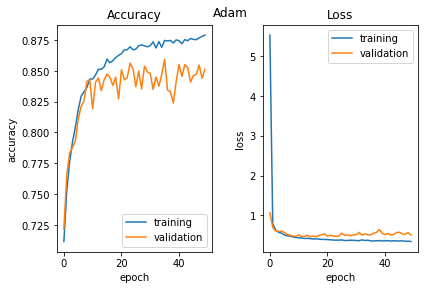

In [55]:
VAL_SPLIT = 0.25
HIDDEN_UNITS = 128
LEARNING_RATE = 0.001
OPTIMIZER = Adam(learning_rate=LEARNING_RATE)
EPOCHS = 50
PLOT_TITLE = "Adam"

model_wrapper(
    hidden_units=HIDDEN_UNITS,
    optimizer=OPTIMIZER,
    epochs=EPOCHS,
    val_split=VAL_SPLIT,
    plot_title=PLOT_TITLE
)

Training
Epoch 1/50
704/704 [==============================] - 3s 4ms/step - loss: 6.2612 - accuracy: 0.6668 - val_loss: 0.9284 - val_accuracy: 0.6975
Epoch 2/50
704/704 [==============================] - 3s 4ms/step - loss: 0.8593 - accuracy: 0.7189 - val_loss: 0.8025 - val_accuracy: 0.7015
Epoch 3/50
704/704 [==============================] - 3s 4ms/step - loss: 0.7386 - accuracy: 0.7557 - val_loss: 0.9771 - val_accuracy: 0.7151
Epoch 4/50
704/704 [==============================] - 3s 4ms/step - loss: 0.6911 - accuracy: 0.7771 - val_loss: 0.8444 - val_accuracy: 0.7660
Epoch 5/50
704/704 [==============================] - 3s 4ms/step - loss: 0.6831 - accuracy: 0.7889 - val_loss: 1.0048 - val_accuracy: 0.7864
Epoch 6/50
704/704 [==============================] - 3s 4ms/step - loss: 0.6296 - accuracy: 0.7984 - val_loss: 0.8379 - val_accuracy: 0.7417
Epoch 7/50
704/704 [==============================] - 3s 4ms/step - loss: 0.6064 - accuracy: 0.8106 - val_loss: 0.7022 - val_accuracy: 0.81

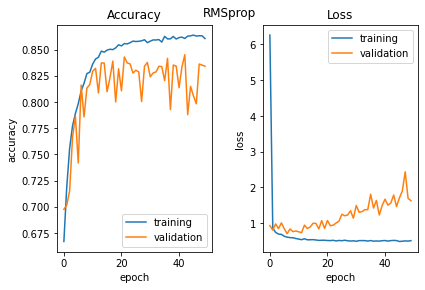

In [56]:
VAL_SPLIT = 0.25
HIDDEN_UNITS = 128
LEARNING_RATE = 0.001
OPTIMIZER = RMSprop(learning_rate=LEARNING_RATE)
EPOCHS = 50
PLOT_TITLE = "RMSprop"

model_wrapper(
    hidden_units=HIDDEN_UNITS,
    optimizer=OPTIMIZER,
    epochs=EPOCHS,
    val_split=VAL_SPLIT,
    plot_title=PLOT_TITLE
)

Training
Epoch 1/50
704/704 [==============================] - 4s 5ms/step - loss: 9.3434 - accuracy: 0.6939 - val_loss: 0.9200 - val_accuracy: 0.7106
Epoch 2/50
704/704 [==============================] - 3s 4ms/step - loss: 0.7454 - accuracy: 0.7737 - val_loss: 0.8158 - val_accuracy: 0.7782
Epoch 3/50
704/704 [==============================] - 3s 4ms/step - loss: 0.6468 - accuracy: 0.8120 - val_loss: 1.3667 - val_accuracy: 0.7500
Epoch 4/50
704/704 [==============================] - 3s 5ms/step - loss: 0.6051 - accuracy: 0.8230 - val_loss: 0.6780 - val_accuracy: 0.8108
Epoch 5/50
704/704 [==============================] - 3s 5ms/step - loss: 0.5945 - accuracy: 0.8306 - val_loss: 0.7595 - val_accuracy: 0.7958
Epoch 6/50
704/704 [==============================] - 3s 5ms/step - loss: 0.5732 - accuracy: 0.8365 - val_loss: 0.6179 - val_accuracy: 0.8325
Epoch 7/50
704/704 [==============================] - 3s 4ms/step - loss: 0.5464 - accuracy: 0.8419 - val_loss: 0.9906 - val_accuracy: 0.78

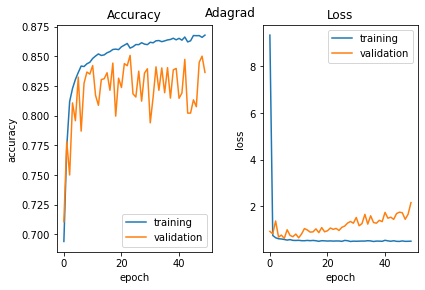

In [57]:
VAL_SPLIT = 0.25
HIDDEN_UNITS = 128
LEARNING_RATE = 0.001
OPTIMIZER = RMSprop(learning_rate=LEARNING_RATE)
EPOCHS = 50
PLOT_TITLE = "Adagrad"

model_wrapper(
    hidden_units=HIDDEN_UNITS,
    optimizer=OPTIMIZER,
    epochs=EPOCHS,
    val_split=VAL_SPLIT,
    plot_title=PLOT_TITLE
)

### Choosing learning rate

Training
Epoch 1/50
704/704 [==============================] - 3s 4ms/step - loss: 17.2198 - accuracy: 0.6774 - val_loss: 8.2554 - val_accuracy: 0.7534
Epoch 2/50
704/704 [==============================] - 2s 3ms/step - loss: 6.5907 - accuracy: 0.7747 - val_loss: 5.7422 - val_accuracy: 0.7804
Epoch 3/50
704/704 [==============================] - 2s 3ms/step - loss: 4.8822 - accuracy: 0.7964 - val_loss: 4.6774 - val_accuracy: 0.7963
Epoch 4/50
704/704 [==============================] - 2s 3ms/step - loss: 4.0145 - accuracy: 0.8062 - val_loss: 4.7527 - val_accuracy: 0.7879
Epoch 5/50
704/704 [==============================] - 2s 3ms/step - loss: 3.3483 - accuracy: 0.8181 - val_loss: 3.6639 - val_accuracy: 0.8051
Epoch 6/50
704/704 [==============================] - 3s 4ms/step - loss: 2.8966 - accuracy: 0.8248 - val_loss: 3.2589 - val_accuracy: 0.8087
Epoch 7/50
704/704 [==============================] - 2s 3ms/step - loss: 2.5278 - accuracy: 0.8300 - val_loss: 2.9351 - val_accuracy: 0.8

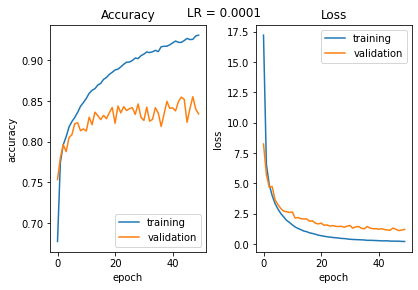

In [58]:
VAL_SPLIT = 0.25
HIDDEN_UNITS = 128
LEARNING_RATE = 0.0001
OPTIMIZER = Adam(learning_rate=LEARNING_RATE)
EPOCHS = 50
PLOT_TITLE = f"LR = {LEARNING_RATE}"

model_wrapper(
    hidden_units=HIDDEN_UNITS,
    optimizer=OPTIMIZER,
    epochs=EPOCHS,
    val_split=VAL_SPLIT,
    plot_title=PLOT_TITLE
)

Training
Epoch 1/50
704/704 [==============================] - 3s 3ms/step - loss: 12.7852 - accuracy: 0.5603 - val_loss: 1.2205 - val_accuracy: 0.6416
Epoch 2/50
704/704 [==============================] - 2s 3ms/step - loss: 1.2151 - accuracy: 0.5750 - val_loss: 1.3682 - val_accuracy: 0.4877
Epoch 3/50
704/704 [==============================] - 2s 3ms/step - loss: 1.4618 - accuracy: 0.4561 - val_loss: 1.5687 - val_accuracy: 0.3838
Epoch 4/50
704/704 [==============================] - 2s 3ms/step - loss: 1.6529 - accuracy: 0.3952 - val_loss: 1.8492 - val_accuracy: 0.2677
Epoch 5/50
704/704 [==============================] - 2s 3ms/step - loss: 1.9045 - accuracy: 0.2720 - val_loss: 1.9426 - val_accuracy: 0.2936
Epoch 6/50
704/704 [==============================] - 3s 4ms/step - loss: 1.9892 - accuracy: 0.2404 - val_loss: 2.0039 - val_accuracy: 0.2159
Epoch 7/50
704/704 [==============================] - 2s 3ms/step - loss: 1.9964 - accuracy: 0.2339 - val_loss: 2.1515 - val_accuracy: 0.1

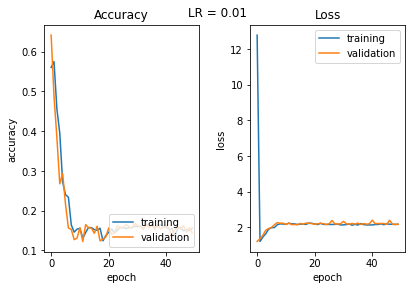

In [59]:
VAL_SPLIT = 0.25
HIDDEN_UNITS = 128
LEARNING_RATE = 0.01
OPTIMIZER = Adam(learning_rate=LEARNING_RATE)
EPOCHS = 50
PLOT_TITLE = f"LR = {LEARNING_RATE}"

model_wrapper(
    hidden_units=HIDDEN_UNITS,
    optimizer=OPTIMIZER,
    epochs=EPOCHS,
    val_split=VAL_SPLIT,
    plot_title=PLOT_TITLE
)

Training
Epoch 1/50
704/704 [==============================] - 3s 4ms/step - loss: 212.0568 - accuracy: 0.1501 - val_loss: 2.1696 - val_accuracy: 0.1697
Epoch 2/50
704/704 [==============================] - 2s 3ms/step - loss: 2.2794 - accuracy: 0.1316 - val_loss: 2.3241 - val_accuracy: 0.0999
Epoch 3/50
704/704 [==============================] - 2s 3ms/step - loss: 2.3111 - accuracy: 0.1006 - val_loss: 2.3263 - val_accuracy: 0.1003
Epoch 4/50
704/704 [==============================] - 2s 3ms/step - loss: 2.3105 - accuracy: 0.1011 - val_loss: 2.3224 - val_accuracy: 0.0993
Epoch 5/50
704/704 [==============================] - 2s 3ms/step - loss: 2.3118 - accuracy: 0.0994 - val_loss: 2.3281 - val_accuracy: 0.1009
Epoch 6/50
704/704 [==============================] - 2s 3ms/step - loss: 2.3110 - accuracy: 0.1007 - val_loss: 2.3252 - val_accuracy: 0.1000
Epoch 7/50
704/704 [==============================] - 2s 3ms/step - loss: 2.3140 - accuracy: 0.0995 - val_loss: 2.3223 - val_accuracy: 0.

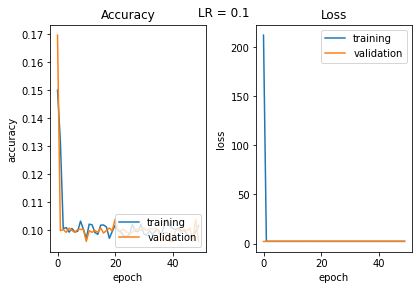

In [60]:
VAL_SPLIT = 0.25
HIDDEN_UNITS = 128
LEARNING_RATE = 0.1
OPTIMIZER = Adam(learning_rate=LEARNING_RATE)
EPOCHS = 50
PLOT_TITLE = f"LR = {LEARNING_RATE}"

model_wrapper(
    hidden_units=HIDDEN_UNITS,
    optimizer=OPTIMIZER,
    epochs=EPOCHS,
    val_split=VAL_SPLIT,
    plot_title=PLOT_TITLE
)

### Choosing epochs

Training
Epoch 1/10
704/704 [==============================] - 3s 4ms/step - loss: 15.7730 - accuracy: 0.6734 - val_loss: 8.4118 - val_accuracy: 0.7448
Epoch 2/10
704/704 [==============================] - 3s 4ms/step - loss: 6.7925 - accuracy: 0.7706 - val_loss: 5.9834 - val_accuracy: 0.7778
Epoch 3/10
704/704 [==============================] - 2s 3ms/step - loss: 5.0148 - accuracy: 0.7921 - val_loss: 4.6590 - val_accuracy: 0.7907
Epoch 4/10
704/704 [==============================] - 3s 4ms/step - loss: 3.8868 - accuracy: 0.8041 - val_loss: 3.8554 - val_accuracy: 0.7908
Epoch 5/10
704/704 [==============================] - 3s 4ms/step - loss: 3.0903 - accuracy: 0.8093 - val_loss: 3.2654 - val_accuracy: 0.8020
Epoch 6/10
704/704 [==============================] - 2s 3ms/step - loss: 2.5364 - accuracy: 0.8144 - val_loss: 2.8492 - val_accuracy: 0.7961
Epoch 7/10
704/704 [==============================] - 2s 3ms/step - loss: 2.1351 - accuracy: 0.8210 - val_loss: 2.6076 - val_accuracy: 0.8

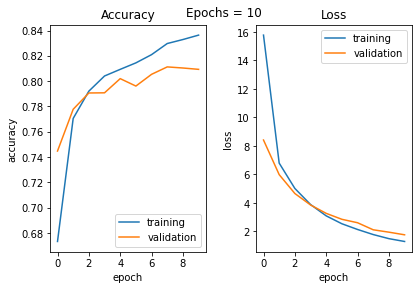

In [61]:
VAL_SPLIT = 0.25
HIDDEN_UNITS = 128
LEARNING_RATE = 0.0001
OPTIMIZER = Adam(learning_rate=LEARNING_RATE)
EPOCHS = 10
PLOT_TITLE = f"Epochs = {EPOCHS}"

model_wrapper(
    hidden_units=HIDDEN_UNITS,
    optimizer=OPTIMIZER,
    epochs=EPOCHS,
    val_split=VAL_SPLIT,
    plot_title=PLOT_TITLE
)